# The goal of this notebook is to model how the shade provided by the shade trees in the agroforestry system is at risk. Here we model the risk for two plots in the dominican rebublic.

## Let's attribute height, tree cover and land cover to the lat/lons that we have for the two agroforestries, we assume that they are square, and that the given lat/lon is the the center of the square

In [1]:
from utils_agroforestry import *
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd

# Load agroforestry composition tables
agroforest = {
    0: pd.read_csv("/Users/szelie/data/unu/agroforestry_systems/aguacate_vegetation.csv"),
    1: pd.read_csv("/Users/szelie/data/unu/agroforestry_systems/piso_verde_vegetation.csv"),
}

# Add system_id for linking to agroforestry composition
points_data = [
    {"lon": -71.252111, "lat": 19.293583, "plot_area_m2": 4184, "system_id": 0},
    {"lon": -71.293917, "lat": 19.308333, "plot_area_m2": 8000, "system_id": 1},
]

# Create GeoDataFrame
gdf_points = gpd.GeoDataFrame(
    points_data,
    geometry=[Point(p["lon"], p["lat"]) for p in points_data],
    crs="EPSG:4326"
)

# Extract features and simulate composition
df_results = extract_features_with_composition(
    gdf=gdf_points,
    agroforest_dict=agroforest,
    raster_source="dominican_republic"
)

print(df_results)


✅ Extracted from: ESA_WorldCover_10m_2021_v200_N18W072_Map.tif, mean: 10.00
✅ Extracted from: ETH_GlobalCanopyHeight_10m_2020_N18W072_Map.tif, mean: 19.86
✅ Extracted from: 20N_080W.tif, mean: 93.00
✅ Extracted from: ESA_WorldCover_10m_2021_v200_N18W072_Map.tif, mean: 10.00
✅ Extracted from: ETH_GlobalCanopyHeight_10m_2020_N18W072_Map.tif, mean: 23.55
✅ Extracted from: 20N_080W.tif, mean: 81.33
  land_use_class  canopy_height  forest_cover        lon        lat  \
0     Tree cover      19.857143     93.000000 -71.252111  19.293583   
1     Tree cover      23.550000     81.333333 -71.293917  19.308333   

   plot_area_m2  system_id                               agroforestry_species  
0          4184          0  [{'species': 'Inga Fagifolia  ', 'type': '1st ...  
1          8000          1  [{'species': 'Soymida febrifuga', 'type': '1st...  


In [2]:
agroforest[1]

,species,type,cover_ratio,quantity,height_min_m,height_max_m
0,Soymida febrifuga,1st tree,1.0,3,5.0,30.0
1,Roystonea hispaniolana,1st tree,1.0,3,5.0,30.0
2,Simarouba glauca,1st tree,0.5,1,5.0,30.0
3,Pinus occidentalis,1st tree,0.5,1,5.0,30.0
4,Cecropia schreberiana,1st tree,0.5,1,5.0,30.0
5,Musa × paradisiaca,2nd tree,5.0,15,2.0,5.0
6,Cajanus cajan,2nd tree,1.0,7,2.0,5.0
7,Anacardium occidentale,2nd tree,1.0,6,2.0,5.0
8,Simarouba glauca,2nd tree,0.5,3,2.0,5.0
9,Citrus × sinensis,2nd tree,0.5,3,2.0,5.0


## --> so now we have the maximum height of the canopy, the forest cover, as well as the land use class:

In [3]:
df_results["agroforestry_class"] = df_results.apply(classify_agroforestry, axis=1)


In [4]:
df_results["geometry"] = df_results.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)


# Now, we have two agroforestry systems, let's plot them on a map

In [5]:
import geopandas as gpd
import folium
from shapely.geometry import Point
gdf_latlon = df_results.copy()

# Define your GeoDataFrame (already created)
# gdf_latlon = df_results  # assuming df_results has 'geometry' and relevant columns

# Define colour map
color_map = {
    "Likely agroforestry": "green",
    "Likely sun-grown": "orange",
    "Mixed or unclear": "purple",
    "Unknown": "gray"
}

# Center map (e.g. on the first point)
center = [
    gdf_latlon.geometry.apply(lambda p: p.y).mean(),
    gdf_latlon.geometry.apply(lambda p: p.x).mean()]
m = folium.Map(location=center, zoom_start=12, tiles=None)

# Add satellite basemap
folium.TileLayer(
    tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}",
    attr="Esri World Imagery",
    name="Esri Satellite",
    overlay=False,
    control=True
).add_to(m)

# Add each point as a CircleMarker
for _, row in gdf_latlon.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=6,
        color=color_map.get(row.get("agroforestry_class", "Unknown"), "black"),
        fill=True,
        fill_opacity=0.8,
        popup=folium.Popup(f"""
            <b>Canopy height:</b> {row.get('canopy_height', 'n/a')} m<br>
            <b>Forest cover:</b> {row.get('forest_cover', 'n/a')} %<br>
            <b>Land use:</b> {row.get('land_use_class', 'n/a')}<br>
            <b>Type:</b> {row.get('agroforestry_class', 'n/a')}
        """, max_width=250)
    ).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Show the map
m


# the following sell is a function to make an agroforestry plot. basically you can either give the number of trees of each species or give a probability of each species occurence. It would then estimate which trees could be there. Not sure if this is useful  

### ☂️ Estimating Shading Contribution per Species

The core objective of this function is to estimate how much **shading** each tree species contributes within a simulated agroforestry plot.

---

#### **Step-by-Step Shading Estimation**

1. **Adjusted Cover Ratio**

   For each species, we calculate an adjusted cover ratio based on how many individuals are present:

   $$
   \text{adjustedCoverRatio} = \text{coverRatio} \times \text{nTrees}
   $$

   This gives the total percent of the plot that would be covered by that species if all trees contributed equally.

2. **Simulated Cover Area (per species)**

   Then, for each species:

   $$
   \text{adjustedCoverArea}_{\text{m²}} = \left( \frac{\text{adjustedCoverRatio}}{100} \right) \times \text{plotSize}_{\text{m²}}
   $$

   This is the raw estimated area each species would cover based on its number of trees and cover ratio.

3. **Total Simulated Cover Area**

   We sum the adjusted cover areas of all species to get:

   $$
   \text{totalSimulatedCoverArea} = \sum \text{adjustedCoverArea}_{\text{m²}}
   $$

4. **Observed Forest Cover from Satellite**

   A reference cover area is computed from the satellite-derived forest cover percentage:

   $$
   \text{satelliteForestArea} = \left( \frac{\text{forestCover}}{100} \right) \times \text{plotSize}_{\text{m²}}
   $$

5. **Final Scaled Shading per Species**

   To ensure realism, each species’ simulated cover area is **scaled** so that the total matches the observed forest cover:

   $$
   \text{shading}_{\text{m²}} = \left( \frac{\text{adjustedCoverArea}_{\text{m²}}}{\text{totalSimulatedCoverArea}} \right) \times \text{satelliteForestArea}
   $$

   This allocates the observed forest cover proportionally among species based on their simulated cover contributions.

---

This scaling approach:

- Ensures consistency with observed land cover data.
- Allows attributing **forest structure and ecosystem function** (like shade) to specific species.
- Enables comparisons across sites with different satellite-observed canopy levels.

The output column `shading_m2` in the final GeoDataFrame contains this final **per-species shading estimate**.


below, we run the simulate_agroforest for each plot and concatenate it

In [6]:
# Run simulations for each row
simulated_results = []
for idx, row in df_results.iterrows():
    species_df = agroforest[idx]  # match by row index
    result_df = simulate_agroforestry_plot(row, row.plot_area_m2, species_df)
    if result_df is not None:
        result_df["plot_index"] = idx
        simulated_results.append(result_df)

# Combine results
agroforest_df = pd.concat(simulated_results, ignore_index=True)


In [7]:
len(result_df[
    (agroforest_df["type"].isin(["1st tree", "2nd tree"]))
])

/Users/szelie/miniforge3/envs/climada_env/lib/python3.11/site-packages/geopandas/geodataframe.py:1459: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


16

In [8]:
agroforest_df[
    (agroforest_df["plot_index"] == 1) &
    (agroforest_df["type"].isin(["1st tree", "2nd tree"]))
].shading_m2.sum()

115.07307796794345

In [9]:
len(agroforest_df[
    (agroforest_df["plot_index"] == 1)
])

31

# plotting shading contribution:

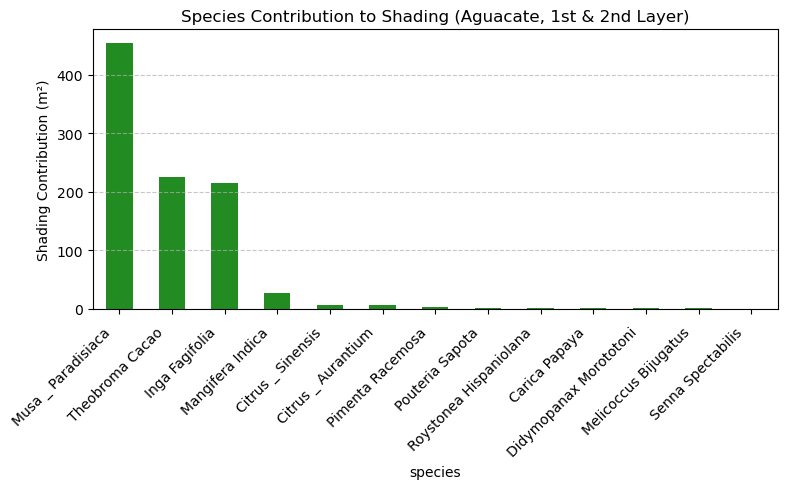

In [10]:
import matplotlib.pyplot as plt

# Filter to first and second layer trees in plot 0
subset = agroforest_df[
    (agroforest_df["plot_index"] == 0) &
    (agroforest_df["type"].isin(["1st tree", "2nd tree"]))
]

# Group by species and sum shading_m2
shading_contrib = (
    subset.groupby("species")["shading_m2"]
    .sum()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(8, 5))
shading_contrib.plot(kind="bar", color="forestgreen")
plt.ylabel("Shading Contribution (m²)")
plt.title("Species Contribution to Shading (Aguacate, 1st & 2nd Layer)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


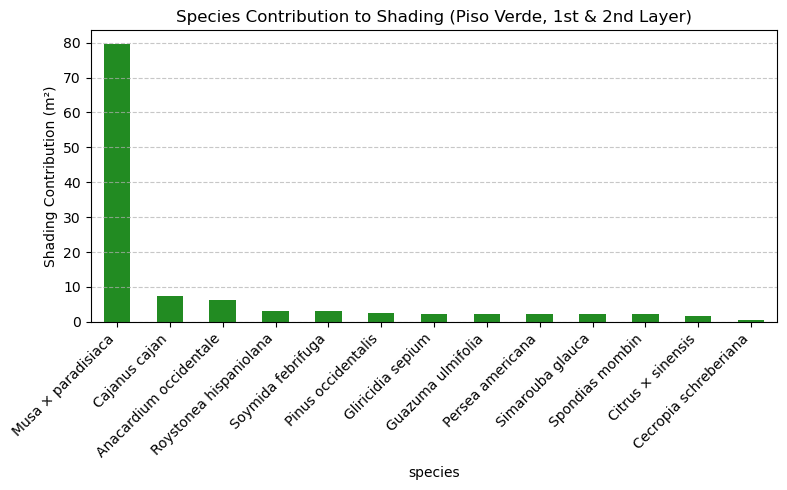

In [11]:
import matplotlib.pyplot as plt

# Filter to first and second layer trees in plot 0
subset = agroforest_df[
    (agroforest_df["plot_index"] == 1) &
    (agroforest_df["type"].isin(["1st tree", "2nd tree"]))
]

# Group by species and sum shading_m2
shading_contrib = (
    subset.groupby("species")["shading_m2"]
    .sum()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(8, 5))
shading_contrib.plot(kind="bar", color="forestgreen")
plt.ylabel("Shading Contribution (m²)")
plt.title("Species Contribution to Shading (Piso Verde, 1st & 2nd Layer)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [12]:
agroforest_df[
    (agroforest_df["plot_index"] == 0)]

,species,n_trees,height_m,height_min_m,height_max_m,type,cover_ratio,role,plot_size_m2,forest_cover,...,system_type,source,geometry,adjusted_cover_ratio,adjusted_cover_area_m2,species_based_cover_area_m2,estimated_forest_cover_area_m2,expected_forest_area_m2,shading_m2,plot_index
0,Inga Fagifolia,43,24.103511,5.0,25.0,1st tree,20.0,upper canopy,4184,93.0,...,Agroforestry,table,POINT (-71.25211 19.29358),860.0,35982.40,35982.40,3891.12,3891.12,215.117202,0
1,Mangifera Indica,22,22.144137,5.0,25.0,1st tree,5.0,upper canopy,4184,93.0,...,Agroforestry,table,POINT (-71.25211 19.29358),110.0,4602.40,4602.40,3891.12,3891.12,27.514991,0
2,Roystonea Hispaniolana,6,8.686244,5.0,25.0,1st tree,1.0,mid canopy,4184,93.0,...,Agroforestry,table,POINT (-71.25211 19.29358),6.0,251.04,251.04,3891.12,3891.12,1.500818,0
3,Didymopanax Morototoni,5,23.242302,5.0,25.0,1st tree,1.0,upper canopy,4184,93.0,...,Agroforestry,table,POINT (-71.25211 19.29358),5.0,209.20,209.20,3891.12,3891.12,1.250681,0
4,Senna Spectabilis,2,23.427515,5.0,25.0,1st tree,0.5,upper canopy,4184,93.0,...,Agroforestry,table,POINT (-71.25211 19.29358),1.0,41.84,41.84,3891.12,3891.12,0.250136,0
5,Musa _ Paradisiaca,52,2.409190,2.0,5.0,2nd tree,35.0,understory,4184,93.0,...,Agroforestry,table,POINT (-71.25211 19.29358),1820.0,76148.80,76148.80,3891.12,3891.12,455.248033,0
6,Theobroma Cacao,45,3.497499,2.0,5.0,2nd tree,20.0,understory,4184,93.0,...,Agroforestry,table,POINT (-71.25211 19.29358),900.0,37656.00,37656.00,3891.12,3891.12,225.122654,0
7,Citrus _ Sinensis,11,2.105094,2.0,5.0,2nd tree,2.5,understory,4184,93.0,...,Agroforestry,table,POINT (-71.25211 19.29358),27.5,1150.60,1150.60,3891.12,3891.12,6.878748,0
8,Citrus _ Aurantium,10,4.387552,2.0,5.0,2nd tree,2.5,understory,4184,93.0,...,Agroforestry,table,POINT (-71.25211 19.29358),25.0,1046.00,1046.00,3891.12,3891.12,6.253407,0
9,Pimenta Racemosa,8,2.809840,2.0,5.0,2nd tree,2.0,understory,4184,93.0,...,Agroforestry,table,POINT (-71.25211 19.29358),16.0,669.44,669.44,3891.12,3891.12,4.002181,0


# load ecocrop, downloaded from here: https://github.com/OpenCLIM/ecocrop
find value per specie

In [13]:
import pandas as pd
from config import ECOCROP_PATH

# Load EcoCrop database
ecocrop = pd.read_csv(ECOCROP_PATH, encoding="latin1")

# Clean EcoCrop species names
ecocrop["species_clean"] = ecocrop["ScientificName"].str.strip().str.lower()

# Select relevant climate and drought-related columns
climate_cols = [
    "species_clean",
    "TMIN", "TOPMN", "TOPMX", "TMAX",
    "RMIN", "ROPMN", "ROPMX", "RMAX",
    "PHOTO", "KTMPR", "KTMP", "CLIZ",
    "DRA", "DRAR"
]
ecocrop_subset = ecocrop[climate_cols]

# Clean and match with agroforest_df
agroforest_df["species_clean"] = agroforest_df["species"].str.strip().str.lower()
agroforest_df = agroforest_df.merge(ecocrop_subset, on="species_clean", how="left")


In [1]:
agroforest_df

NameError: name 'agroforest_df' is not defined

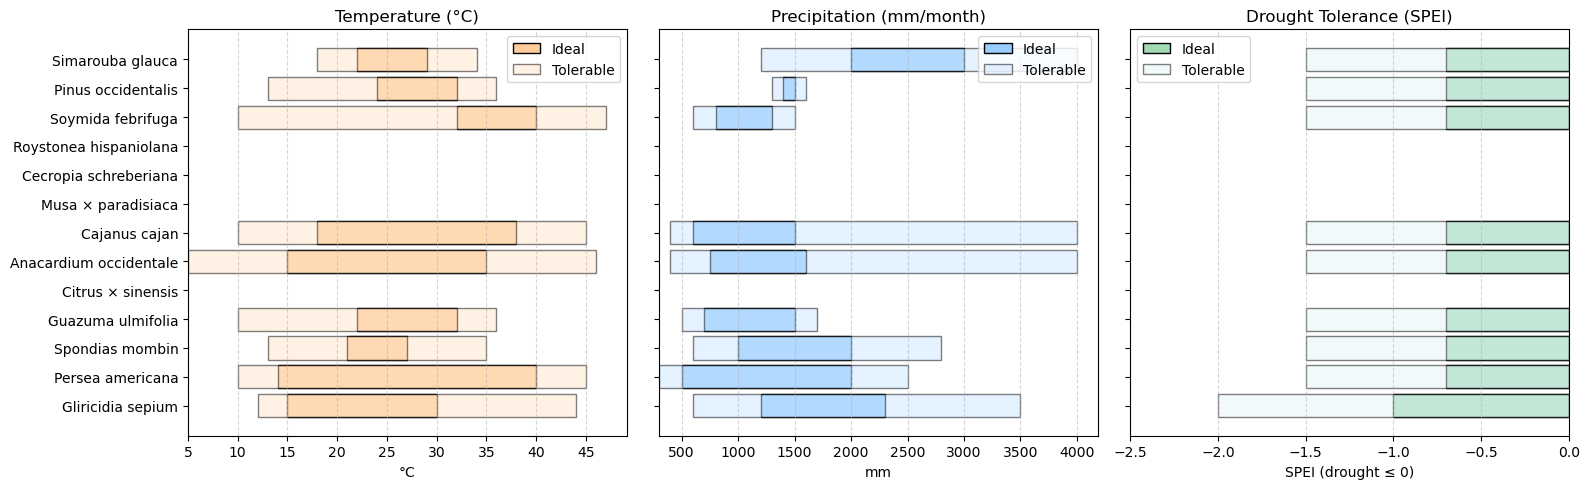

In [45]:
spei_dict = generate_spei_dict_from_dra(agroforest_df[
    (agroforest_df["plot_index"] == 1) &
    (agroforest_df["type"].isin(["1st tree", "2nd tree"]))
])
plot_agroforest_vulnerability(agroforest_df[
    (agroforest_df["plot_index"] == 1) &
    (agroforest_df["type"].isin(["1st tree", "2nd tree"]))
], spei_dict)



/Users/szelie/python_projects/coffee_banana_cacao_climate_risk/risk_shading/utils_agroforestry.py:444: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


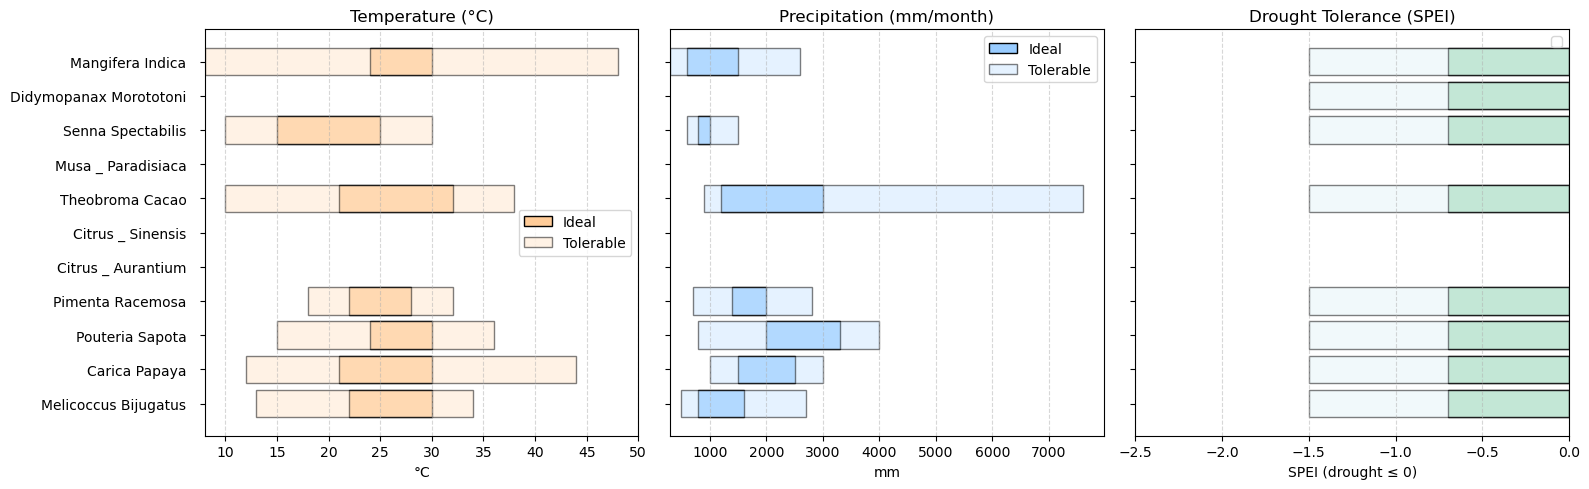

In [16]:
spei_dict = generate_spei_dict_from_dra(agroforest_df[
    (agroforest_df["plot_index"] == 0) &
    (agroforest_df["type"].isin(["1st tree", "2nd tree"]))
])
plot_agroforest_vulnerability(agroforest_df[
    (agroforest_df["plot_index"] == 0) &
    (agroforest_df["type"].isin(["1st tree", "2nd tree"]))
], spei_dict)



### 🔥🌧️ Generating Synthetic Climate Hazards for the Dominican Republic (DR)

This following cell builds synthetic 100-year hazard datasets for **heat (temperature)** and **drought (precipitation)** using the **TerraClimate** dataset and the **CLIMADA** hazard modeling framework. It performs the following steps:

---

#### 1. **Setup and Dataset Paths**
- Two climate scenarios are used:
  - `"historical"`: Historical climate data.
  - `"plus2C"`: Future climate scenario with +2°C warming.
- Files are cropped to the **Dominican Republic** using latitude and longitude bounds.

---

#### 2. **Annual Aggregation**
- Function: `get_annual_aggregates(path)`
  - Loads annual maxima of:
    - `tmin`: daily minimum temperature
    - `tmax`: daily maximum temperature
  - Computes annual max of mean temperature:  
    \[
    t_{\text{mean}} = \frac{t_{\text{max}} + t_{\text{min}}}{2}
    \]
  - Computes annual total **precipitation**.
  - Clips all outputs to DR extent.

---

#### 3. **Extreme Value Sampling (GEV)**
- Function: `generate_gev_sample_field(dataarray, n_years=100)`
  - Fits a **Generalized Extreme Value (GEV)** distribution at each grid point.
  - Draws 100 synthetic samples per pixel to simulate extreme future events.
  - If `invert=True`, the distribution is mirrored (used for **low precipitation** extremes).

---

#### 4. **Hazard Object Creation**
- Function: `create_hazard_from_array(...)`
  - Converts the synthetic yearly fields into **CLIMADA-compatible Hazard objects**.
  - Hazard type:
    - `"TM"` for temperature (`degC`)
    - `"PR"` for precipitation (`mm`)
  - Each year is treated as a separate event.
  - Includes:
    - `intensity` matrix (year × location)
    - `centroids` grid
    - event metadata (IDs, names, dates, frequency)

---

#### 5. **Run Full Pipeline**
- For each scenario:
  - Aggregates the raw climate data.
  - Samples 100 synthetic years for both temperature and precipitation.
  - Builds and stores the corresponding Hazard objects in a dictionary.

```python
hazard_dict = {
    "historical": {
        "TM": Hazard object for temperature,
        "PR": Hazard object for precipitation
    },
    "plus2C": {
        "TM": ...,
        "PR": ...
    }
}


In [17]:
import os
from climada.hazard.base import Hazard
from config import DATA_DIR, TERRACLIMATE_PATHS
from utils_hazards import (
    get_aggregates, compute_spei_3,
    generate_gev_sample_field, create_hazard_from_array
)

# === Settings ===
LAT_BOUNDS_DR = (20.0, 17.5)
LON_BOUNDS_DR = (-72.0, -68.0)
haz_types = ["TM", "PR", "SPEI"]
output_dir = os.path.join(DATA_DIR, "hazards_dominican_republic")
os.makedirs(output_dir, exist_ok=True)

def get_hazard_path(scenario, haz_type):
    return os.path.join(output_dir, f"write_hazard_{scenario}_{haz_type}.hdf5")

def load_hazard_from_file(scenario, haz_type):
    path = get_hazard_path(scenario, haz_type)
    haz = Hazard.from_hdf5(path)
    print(f"📂 Loaded: {path}")
    return haz

def save_hazard_to_file(hazard, scenario, haz_type):
    path = get_hazard_path(scenario, haz_type)
    hazard.write_hdf5(path)
    print(f"💾 Saved: {path}")

# === Main loop ===
hazard_dict = {}

for scenario, path in TERRACLIMATE_PATHS.items():
    print(f"\n🚀 Processing scenario: {scenario}")
    all_exist = all(os.path.exists(get_hazard_path(scenario, haz_type)) for haz_type in haz_types)

    if all_exist:
        print("✅ All hazard files found — skipping computation.")
        hazard_dict[scenario] = {
            haz_type: load_hazard_from_file(scenario, haz_type)
            for haz_type in haz_types
        }
        continue

    print("🧮 Computing hazards...")
    tmean, ppt, ppt_monthly, pet_monthly = get_aggregates(path)

    print("🌵 Computing SPEI...")
    spei_3 = compute_spei_3(ppt_monthly, pet_monthly)
    spei_yearly = spei_3.groupby(spei_3.time.dt.year).min("time")

    print("🎲 Sampling synthetic HOT, DRY, and DRIEST years (GEV)...")
    tmean_100yrs = generate_gev_sample_field(tmean, n_years=100)
    ppt_100yrs = generate_gev_sample_field(ppt, n_years=100, invert=True)
    spei_100yrs = generate_gev_sample_field(spei_yearly, n_years=100, invert=True)

    print("🌍 Creating CLIMADA Hazard objects...")
    haz_tmean = create_hazard_from_array(tmean_100yrs, haz_type="TM", units="degC")
    haz_ppt = create_hazard_from_array(ppt_100yrs, haz_type="PR", units="mm")
    haz_spei = create_hazard_from_array(spei_100yrs, haz_type="SPEI", units="index")

    # Save to disk
    save_hazard_to_file(haz_tmean, scenario, "TM")
    save_hazard_to_file(haz_ppt, scenario, "PR")
    save_hazard_to_file(haz_spei, scenario, "SPEI")

    hazard_dict[scenario] = {
        "TM": haz_tmean,
        "PR": haz_ppt,
        "SPEI": haz_spei
    }

print("\n✅ Done: HOT, DRY & DRIEST hazard generation or loading completed.")



🚀 Processing scenario: plus2C
✅ All hazard files found — skipping computation.
📂 Loaded: /Users/szelie/data/unu/hazards_dominican_republic/write_hazard_plus2C_TM.hdf5
📂 Loaded: /Users/szelie/data/unu/hazards_dominican_republic/write_hazard_plus2C_PR.hdf5
📂 Loaded: /Users/szelie/data/unu/hazards_dominican_republic/write_hazard_plus2C_SPEI.hdf5

🚀 Processing scenario: historical
✅ All hazard files found — skipping computation.
📂 Loaded: /Users/szelie/data/unu/hazards_dominican_republic/write_hazard_historical_TM.hdf5
📂 Loaded: /Users/szelie/data/unu/hazards_dominican_republic/write_hazard_historical_PR.hdf5
📂 Loaded: /Users/szelie/data/unu/hazards_dominican_republic/write_hazard_historical_SPEI.hdf5

✅ Done: HOT, DRY & DRIEST hazard generation or loading completed.


# plotting the shift with climate change:

In [18]:
hazard_dict

{'plus2C': {'TM': <climada.hazard.base.Hazard at 0x301cf7ed0>,
  'PR': <climada.hazard.base.Hazard at 0x303577410>,
  'SPEI': <climada.hazard.base.Hazard at 0x3032cd310>},
 'historical': {'TM': <climada.hazard.base.Hazard at 0x301b65d10>,
  'PR': <climada.hazard.base.Hazard at 0x303862e90>,
  'SPEI': <climada.hazard.base.Hazard at 0x301b64510>}}

In [19]:
from climada.util.api_client import Client
client = Client()

# Load historical and future tropical cyclone hazards
tc_hist_proba = client.get_hazard(
    'tropical_cyclone',
    properties={"country_iso3alpha":"DOM", "event_type":"synthetic", "climate_scenario":"None"}
)

tc_future_proba = client.get_hazard(
    'tropical_cyclone',
    properties={"country_iso3alpha":"DOM", "event_type":"synthetic", "climate_scenario":"rcp45", "ref_year": "2060"}
)

# Add to your hazard dictionary
hazard_dict['historical']["TC"] = tc_hist_proba
hazard_dict["plus2C"]['TC'] = tc_future_proba


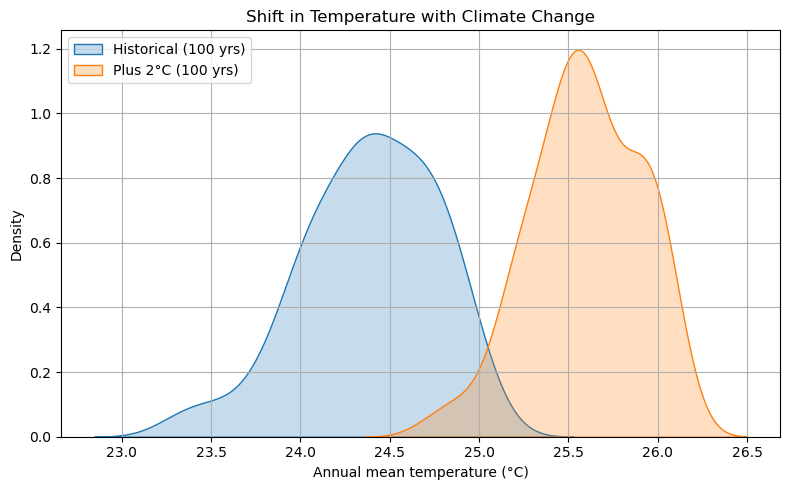

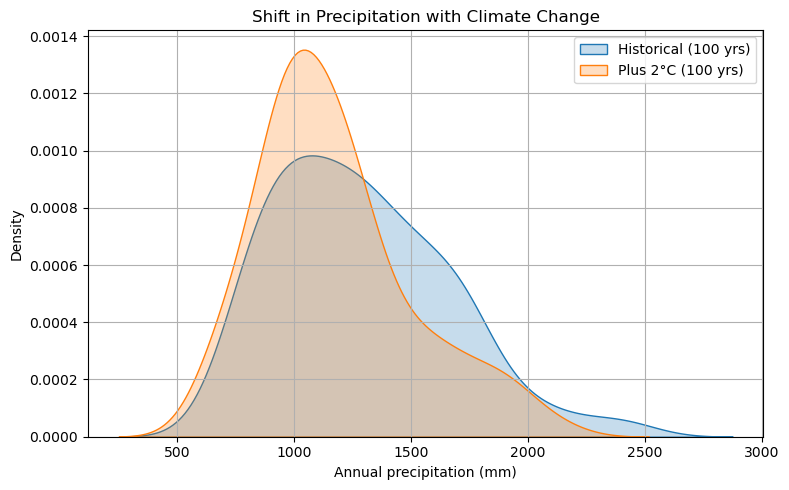

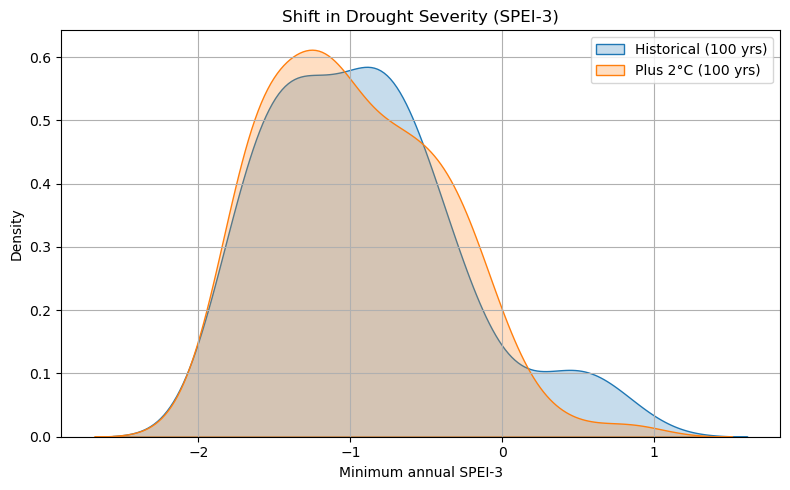

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the location
lat = 19.293583
lon = -71.252111

# Helper to extract intensity at the nearest point
def get_intensity_at_point(hazard, lat, lon):
    dists = np.sqrt((hazard.centroids.lat - lat)**2 + (hazard.centroids.lon - lon)**2)
    idx = dists.argmin()
    return hazard.intensity.toarray()[:, idx]

# Extract values
tmean_hist = get_intensity_at_point(hazard_dict["historical"]["TM"], lat, lon)
tmean_fut  = get_intensity_at_point(hazard_dict["plus2C"]["TM"], lat, lon)

ppt_hist = get_intensity_at_point(hazard_dict["historical"]["PR"], lat, lon)
ppt_fut  = get_intensity_at_point(hazard_dict["plus2C"]["PR"], lat, lon)

spei_hist = get_intensity_at_point(hazard_dict["historical"]["SPEI"], lat, lon)
spei_fut  = get_intensity_at_point(hazard_dict["plus2C"]["SPEI"], lat, lon)

# Plot helper
def plot_kde_comparison(hist_vals, fut_vals, xlabel, title):
    plt.figure(figsize=(8, 5))
    sns.kdeplot(hist_vals, label="Historical (100 yrs)", fill=True)
    sns.kdeplot(fut_vals, label="Plus 2°C (100 yrs)", fill=True)
    plt.xlabel(xlabel)
    plt.ylabel("Density")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot all 3 variables
plot_kde_comparison(tmean_hist, tmean_fut, "Annual mean temperature (°C)", "Shift in Temperature with Climate Change")
plot_kde_comparison(ppt_hist, ppt_fut, "Annual precipitation (mm)", "Shift in Precipitation with Climate Change")
plot_kde_comparison(spei_hist, spei_fut, "Minimum annual SPEI-3", "Shift in Drought Severity (SPEI-3)")


# let's add impact functions based on FAO thresholds:

In [21]:
tmean, ppt, ppt_monthly, pet_monthly = get_aggregates(path)

📂 Loading 38 files for tmin
📂 Loading 38 files for tmax
📂 Loading 38 files for ppt
📂 Loading 38 files for pet


In [22]:
agroforest_df

,species,n_trees,height_m,height_min_m,height_max_m,type,cover_ratio,role,plot_size_m2,forest_cover,...,RMIN,ROPMN,ROPMX,RMAX,PHOTO,KTMPR,KTMP,CLIZ,DRA,DRAR
0,Inga Fagifolia,43,24.103511,5.0,25.0,1st tree,20.0,upper canopy,4184,93.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mangifera Indica,22,22.144137,5.0,25.0,1st tree,5.0,upper canopy,4184,93.000000,...,300.0,600.0,1500.0,2600.0,"short day (<12 hours), neutral day (12-14 hour...",-1.0,0.0,"tropical wet & dry (Aw), tropical wet (Ar), de...",well (dry spells),"well (dry spells), excessive (dry/moderately dry)"
2,Roystonea Hispaniolana,6,8.686244,5.0,25.0,1st tree,1.0,mid canopy,4184,93.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Didymopanax Morototoni,5,23.242302,5.0,25.0,1st tree,1.0,upper canopy,4184,93.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"tropical wet & dry (Aw), tropical wet (Ar)",well (dry spells),"poorly (saturated >50% of year), well (dry spe..."
4,Senna Spectabilis,2,23.427515,5.0,25.0,1st tree,0.5,upper canopy,4184,93.000000,...,600.0,800.0,1000.0,1500.0,NaN,NaN,NaN,"tropical wet & dry (Aw), subtropical humid (Cf)",well (dry spells),well (dry spells)
5,Musa _ Paradisiaca,52,2.409190,2.0,5.0,2nd tree,35.0,understory,4184,93.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Theobroma Cacao,45,3.497499,2.0,5.0,2nd tree,20.0,understory,4184,93.000000,...,900.0,1200.0,3000.0,7600.0,"short day (<12 hours), neutral day (12-14 hour...",5.0,0.0,"tropical wet & dry (Aw), tropical wet (Ar)",well (dry spells),well (dry spells)
7,Citrus _ Sinensis,11,2.105094,2.0,5.0,2nd tree,2.5,understory,4184,93.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Citrus _ Aurantium,10,4.387552,2.0,5.0,2nd tree,2.5,understory,4184,93.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Pimenta Racemosa,8,2.809840,2.0,5.0,2nd tree,2.0,understory,4184,93.000000,...,700.0,1400.0,2000.0,2800.0,short day (<12 hours),5.0,5.0,"tropical wet & dry (Aw), tropical wet (Ar)",well (dry spells),well (dry spells)


In [23]:
import copy
from climada.engine import ImpactCalc
from climada.entity import Exposures, ImpactFuncSet
from utils_agroforestry import (
    define_temp_prec_impfs,
    define_tc_impfs,
    define_drought_impfs,
    assign_impact_function_ids,
    generate_spei_dict_from_dra
)

# === STEP 1: Define temperature & precipitation impact functions
impf_set_temp_prec, species_to_temp_id, species_to_prec_id = define_temp_prec_impfs(
    agroforest_df, tmean, ppt
)

# === STEP 2: Define wind (TC) impact functions
impf_set_tc = define_tc_impfs()

# === STEP 3: Define drought (SPEI) impact functions
spei_dict = generate_spei_dict_from_dra(agroforest_df)
impf_set_drought, species_to_drought_id = define_drought_impfs(spei_dict)

# === STEP 4: Assign impact function IDs to exposure data
agroforest_df = assign_impact_function_ids(
    agroforest_df,
    species_to_temp_id,
    species_to_prec_id,
    species_to_drought_id=species_to_drought_id
)



2025-06-19 12:21:01,848 - climada.entity.impact_funcs.impact_func_set - WARNING - Input ImpactFunc's id not set.
2025-06-19 12:21:01,854 - climada.entity.impact_funcs.impact_func_set - WARNING - Input ImpactFunc's id not set.


In [24]:
# === STEP 5: Merge all impact functions into a single ImpactFuncSet
impf_set = ImpactFuncSet()

for sub_set in [impf_set_temp_prec, impf_set_tc, impf_set_drought]:
    for haz_funcs in sub_set.get_func().values():  # haz_funcs = {id: ImpactFunc, ...}
        for impf in haz_funcs.values():
            impf_set.append(copy.deepcopy(impf))


2025-06-19 12:21:01,859 - climada.entity.impact_funcs.impact_func_set - WARNING - Input ImpactFunc's id not set.
2025-06-19 12:21:01,860 - climada.entity.impact_funcs.impact_func_set - WARNING - Input ImpactFunc's id not set.


<Axes: title={'center': 'DR 2: Drought tolerance - Ananas Comosus  '}, xlabel='Intensity ()', ylabel='Impact (%)'>

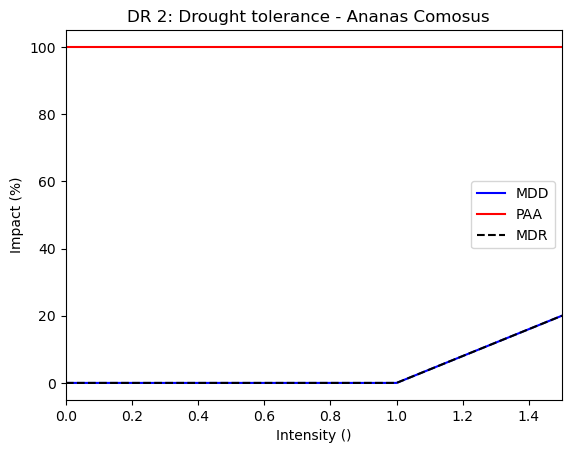

In [25]:
func = impf_set.get_func()
func['DR'][2].plot()

In [26]:
for scenario in hazard_dict:
    hazard_dict[scenario]['SPEI'].intensity = -hazard_dict[scenario]['SPEI'].intensity #climada struggles with negative hazard values
    for haz in hazard_dict[scenario]:
        hazard_dict[scenario][haz].event_id = np.array(hazard_dict[scenario][haz].event_id)

# impact calculation:

In [36]:
from climada.engine import ImpactCalc
from climada.entity import Exposures

# Use shading as value at risk
agroforest_df["value"] = agroforest_df["shading_m2"]

# Define all plot indices you want to compute (e.g. 1 and 2)
plot_indices = agroforest_df["plot_index"].unique()

# Output dict: plot -> scenario -> hazard
impact_results = {}

for plot_idx in plot_indices:
    print(f"🌱 Processing plot {plot_idx}")
    
    # Filter exposure to shade trees in current plot
    exp = Exposures(data=agroforest_df[
        (agroforest_df["plot_index"] == plot_idx) &
        (agroforest_df["type"].isin(["1st tree", "2nd tree"]))
    ])
    
    impact_results[plot_idx] = {}
    
    for scenario, hazards in hazard_dict.items():
        impact_results[plot_idx][scenario] = {}
        
        for haz_type, hazard in hazards.items():
            print(f"🔧 Computing impact for plot {plot_idx} | {scenario} - {haz_type}")
            
            if haz_type == "SPEI":
                hazard.haz_type = "DR"  # drought code alias
            
            impact = ImpactCalc(exp, impf_set, hazard).impact(save_mat=True)
            impact_results[plot_idx][scenario][haz_type] = impact


🌱 Processing plot 0
🔧 Computing impact for plot 0 | plus2C - TM
🔧 Computing impact for plot 0 | plus2C - PR
2025-06-19 12:22:30,957 - climada.hazard.base - WARNING - Impact function id=2 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.
2025-06-19 12:22:30,961 - climada.hazard.base - WARNING - Impact function id=4 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.
2025-06-19 12:22:30,965 - climada.hazard.base - WARNING - Impact function id=6 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.
2025-06-19 12:22:30,968 - climada.hazard.base - WARNING - Impact function id=8 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.
2025-06-19 12:22

In [28]:
exp.gdf

,species,n_trees,height_m,height_min_m,height_max_m,type,cover_ratio,role,plot_size_m2,forest_cover,...,impf_TM,impf_PR,impf_DR,impf_TC,value,geometry,centr_TM,centr_PR,centr_DR,centr_TC
29,Soymida febrifuga,3,18.204314,5.0,30.0,1st tree,1.0,upper canopy,8000,81.333333,...,31,32,24,1,3.181744,POINT (-71.29392 19.30833),1552,1552,1552,538
30,Roystonea hispaniolana,3,29.358748,5.0,30.0,1st tree,1.0,upper canopy,8000,81.333333,...,33,34,0,1,3.181744,POINT (-71.29392 19.30833),1552,1552,1552,538
31,Simarouba glauca,1,29.974692,5.0,30.0,1st tree,0.5,upper canopy,8000,81.333333,...,35,36,23,1,0.530291,POINT (-71.29392 19.30833),1552,1552,1552,538
32,Pinus occidentalis,1,20.491554,5.0,30.0,1st tree,0.5,upper canopy,8000,81.333333,...,37,38,19,1,0.530291,POINT (-71.29392 19.30833),1552,1552,1552,538
33,Cecropia schreberiana,1,16.759826,5.0,30.0,1st tree,0.5,upper canopy,8000,81.333333,...,33,34,0,1,0.530291,POINT (-71.29392 19.30833),1552,1552,1552,538
34,Musa × paradisiaca,15,2.156340,2.0,5.0,2nd tree,5.0,understory,8000,81.333333,...,33,34,0,3,79.543602,POINT (-71.29392 19.30833),1552,1552,1552,538
35,Cajanus cajan,7,4.037221,2.0,5.0,2nd tree,1.0,understory,8000,81.333333,...,39,40,5,3,7.424070,POINT (-71.29392 19.30833),1552,1552,1552,538
36,Anacardium occidentale,6,2.012672,2.0,5.0,2nd tree,1.0,understory,8000,81.333333,...,41,42,1,3,6.363488,POINT (-71.29392 19.30833),1552,1552,1552,538
37,Simarouba glauca,3,3.126284,2.0,5.0,2nd tree,0.5,understory,8000,81.333333,...,35,36,23,3,1.590872,POINT (-71.29392 19.30833),1552,1552,1552,538
38,Citrus × sinensis,3,3.976126,2.0,5.0,2nd tree,0.5,understory,8000,81.333333,...,33,34,0,3,1.590872,POINT (-71.29392 19.30833),1552,1552,1552,538


# Impacts:

2025-06-19 12:24:30,676 - climada.engine.impact - WARNING - The Impact.tot_value attribute is deprecated.Use Exposures.affected_total_value to calculate the affected total exposure value based on a specific hazard intensity threshold


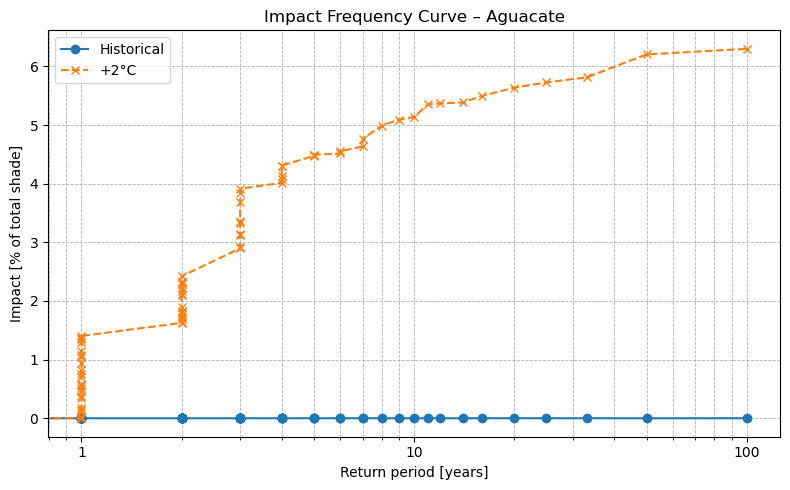

2025-06-19 12:24:30,816 - climada.engine.impact - WARNING - The Impact.tot_value attribute is deprecated.Use Exposures.affected_total_value to calculate the affected total exposure value based on a specific hazard intensity threshold


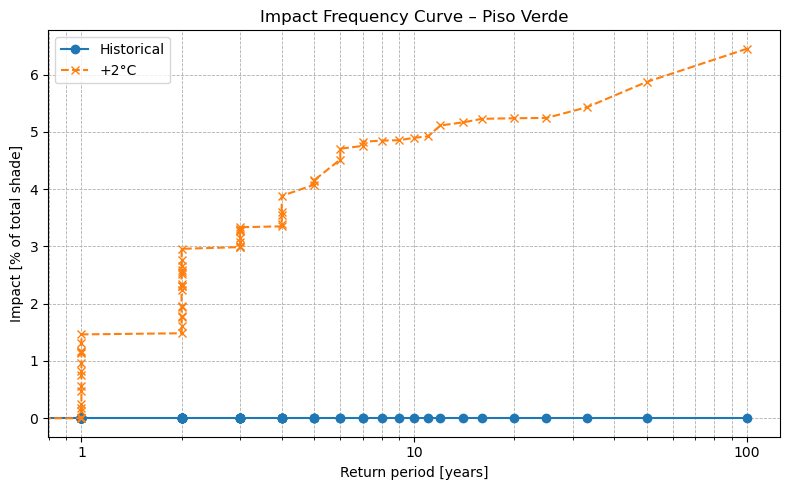

In [38]:
import matplotlib.pyplot as plt

hazard_key = "TM"  # Or loop over this later if needed
plot_labels = {
    0: "Aguacate",
    1: "Piso Verde"
}

for plot_idx in impact_results.keys():
    freq_hist = impact_results[plot_idx]['historical'][hazard_key].calc_freq_curve()
    freq_sim = impact_results[plot_idx]['plus2C'][hazard_key].calc_freq_curve()
    base_tot_value = impact_results[plot_idx]['plus2C'][hazard_key].tot_value

    label = plot_labels.get(plot_idx, f"Plot {plot_idx}")

    plt.figure(figsize=(8, 5))
    plt.plot(freq_hist.return_per.astype(int),
             100 * freq_hist.impact / base_tot_value,
             label="Historical", marker='o', linestyle='-')

    plt.plot(freq_sim.return_per.astype(int),
             100 * freq_sim.impact / base_tot_value,
             label="+2°C", marker='x', linestyle='--')

    plt.xlabel("Return period [years]")
    plt.ylabel("Impact [% of total shade]")
    plt.title(f"Impact Frequency Curve – {label}")
    plt.legend()
    plt.grid(True, which="both", linestyle='--', linewidth=0.6)
    plt.xscale("log")
    plt.xticks([1, 10, 100], labels=["1", "10", "100"])
    plt.tight_layout()
    plt.show()


2025-06-19 12:25:34,955 - climada.engine.impact - WARNING - The Impact.tot_value attribute is deprecated.Use Exposures.affected_total_value to calculate the affected total exposure value based on a specific hazard intensity threshold


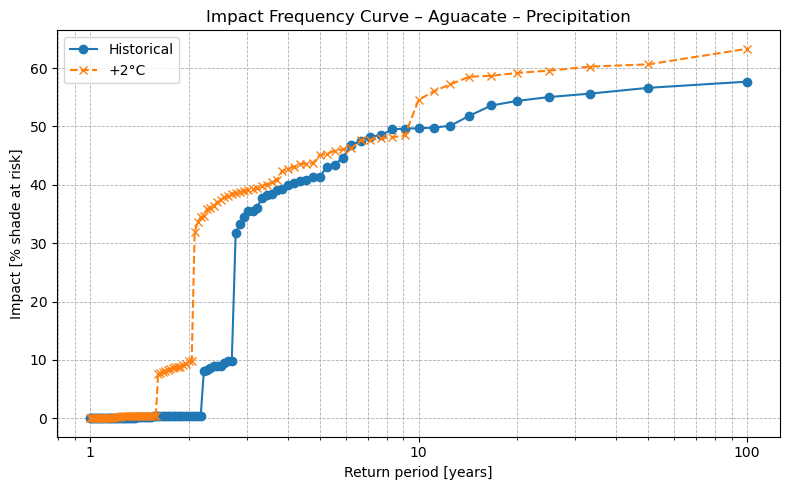

2025-06-19 12:25:35,093 - climada.engine.impact - WARNING - The Impact.tot_value attribute is deprecated.Use Exposures.affected_total_value to calculate the affected total exposure value based on a specific hazard intensity threshold


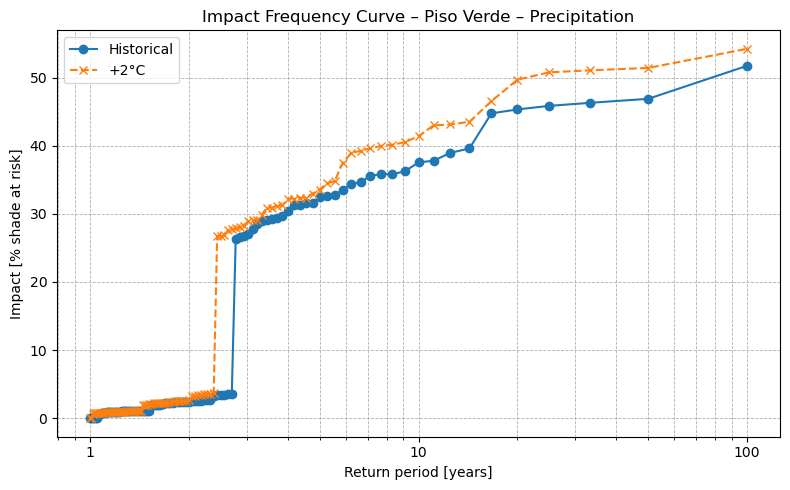

In [39]:
import matplotlib.pyplot as plt

hazard_key = "PR"  # Change to other hazards as needed
plot_labels = {
    0: "Aguacate",
    1: "Piso Verde"
}

for plot_idx in impact_results.keys():
    freq_hist = impact_results[plot_idx]['historical'][hazard_key].calc_freq_curve()
    freq_sim = impact_results[plot_idx]['plus2C'][hazard_key].calc_freq_curve()
    base_tot_value = impact_results[plot_idx]['plus2C'][hazard_key].tot_value

    label = plot_labels.get(plot_idx, f"Plot {plot_idx}")

    plt.figure(figsize=(8, 5))
    plt.plot(freq_hist.return_per,
             100 * freq_hist.impact / base_tot_value,
             label="Historical", marker='o', linestyle='-')

    plt.plot(freq_sim.return_per,
             100 * freq_sim.impact / base_tot_value,
             label="+2°C", marker='x', linestyle='--')

    plt.xlabel("Return period [years]")
    plt.ylabel("Impact [% shade at risk]")
    plt.title(f"Impact Frequency Curve – {label} – Precipitation")
    plt.legend()
    plt.grid(True, which="both", linestyle='--', linewidth=0.6)
    plt.xscale("log")
    plt.xticks([1, 10, 100], labels=["1", "10", "100"])
    plt.tight_layout()
    plt.show()


2025-06-19 12:26:05,437 - climada.engine.impact - WARNING - The Impact.tot_value attribute is deprecated.Use Exposures.affected_total_value to calculate the affected total exposure value based on a specific hazard intensity threshold


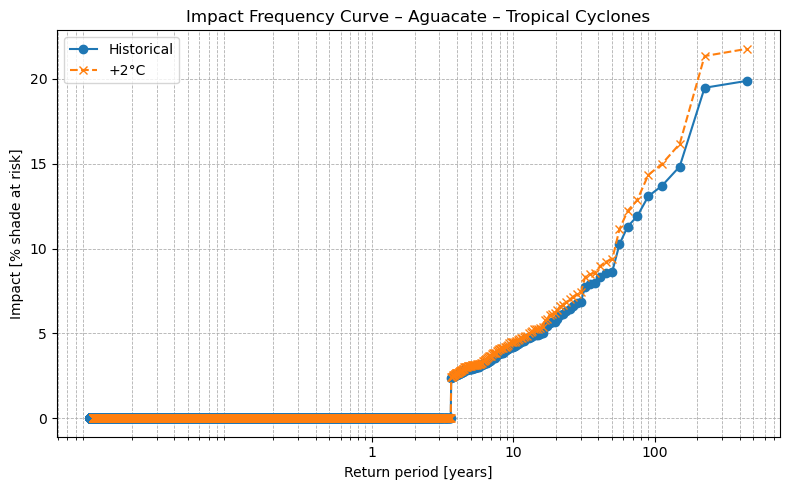

2025-06-19 12:26:05,736 - climada.engine.impact - WARNING - The Impact.tot_value attribute is deprecated.Use Exposures.affected_total_value to calculate the affected total exposure value based on a specific hazard intensity threshold


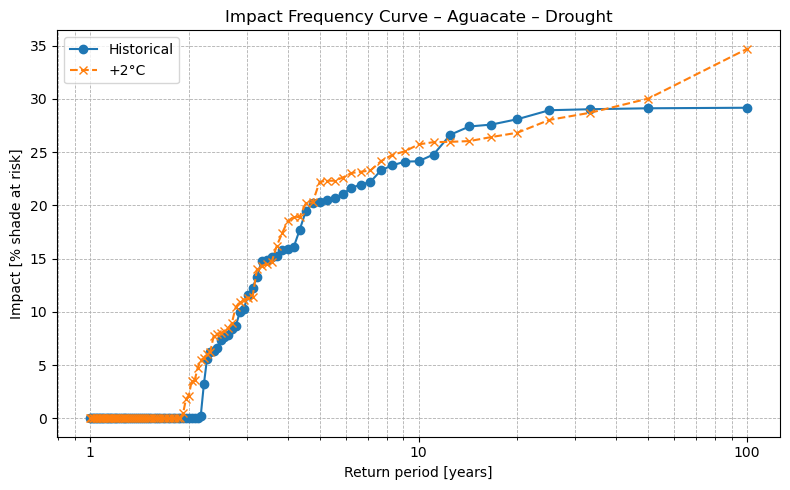

2025-06-19 12:26:05,834 - climada.engine.impact - WARNING - The Impact.tot_value attribute is deprecated.Use Exposures.affected_total_value to calculate the affected total exposure value based on a specific hazard intensity threshold


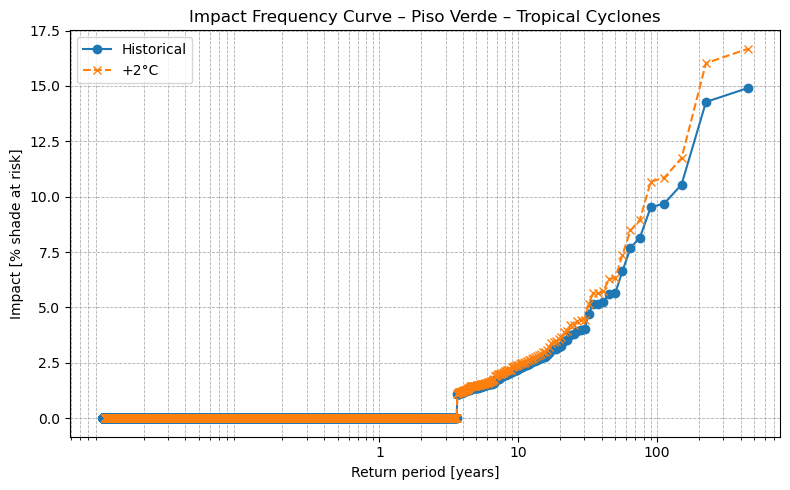

2025-06-19 12:26:06,028 - climada.engine.impact - WARNING - The Impact.tot_value attribute is deprecated.Use Exposures.affected_total_value to calculate the affected total exposure value based on a specific hazard intensity threshold


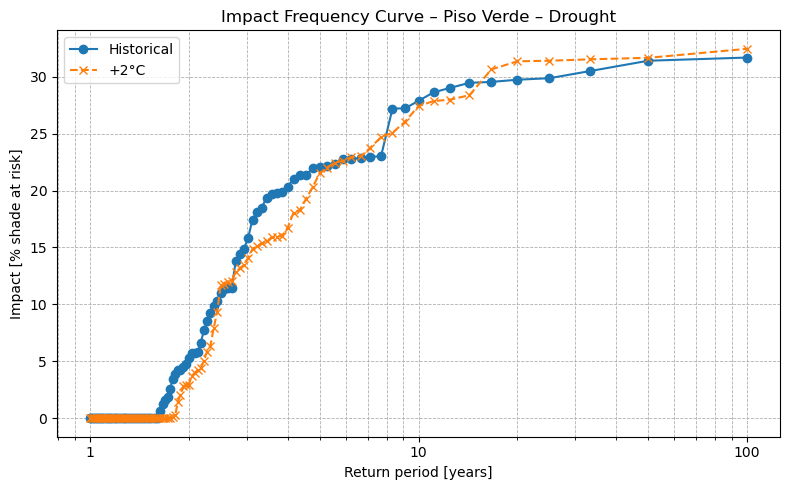

In [40]:
import matplotlib.pyplot as plt

hazards_to_plot = {
    "TC": "Tropical Cyclones",
    "SPEI": "Drought"
}

plot_labels = {
    0: "Aguacate",
    1: "Piso Verde"
}

for plot_idx, plot_name in plot_labels.items():
    for haz_code, haz_label in hazards_to_plot.items():
        freq_hist = impact_results[plot_idx]['historical'][haz_code].calc_freq_curve()
        freq_sim = impact_results[plot_idx]['plus2C'][haz_code].calc_freq_curve()

        base_tot_value = impact_results[plot_idx]['plus2C'][haz_code].tot_value

        plt.figure(figsize=(8, 5))
        plt.plot(freq_hist.return_per,
                 100 * freq_hist.impact / base_tot_value,
                 label="Historical", marker='o', linestyle='-')

        plt.plot(freq_sim.return_per,
                 100 * freq_sim.impact / base_tot_value,
                 label="+2°C", marker='x', linestyle='--')

        plt.xlabel("Return period [years]")
        plt.ylabel("Impact [% shade at risk]")
        plt.title(f"Impact Frequency Curve – {plot_name} – {haz_label}")
        plt.legend()
        plt.grid(True, which="both", linestyle='--', linewidth=0.6)
        plt.xscale("log")
        plt.xticks([1, 10, 100], labels=["1", "10", "100"])
        plt.tight_layout()
        plt.show()


In [32]:
impact_results['historical']['PR'].aai_agg/impact_results['historical']['PR'].tot_value

2025-06-19 12:21:02,521 - climada.engine.impact - WARNING - The Impact.tot_value attribute is deprecated.Use Exposures.affected_total_value to calculate the affected total exposure value based on a specific hazard intensity threshold


0.1346447262628441

# Let's check which species are most at risk:

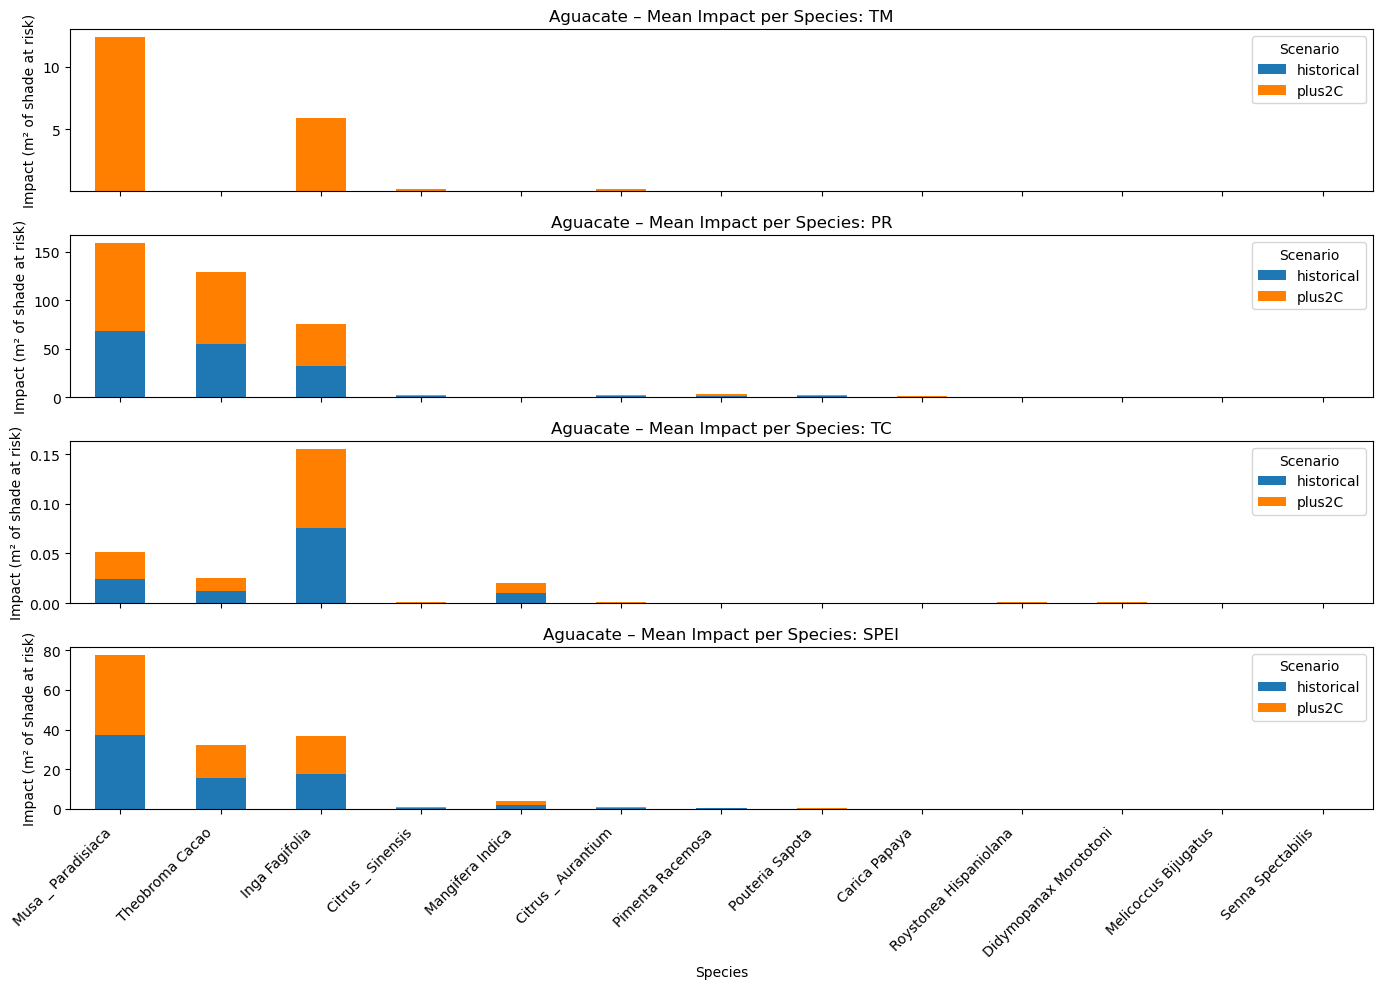

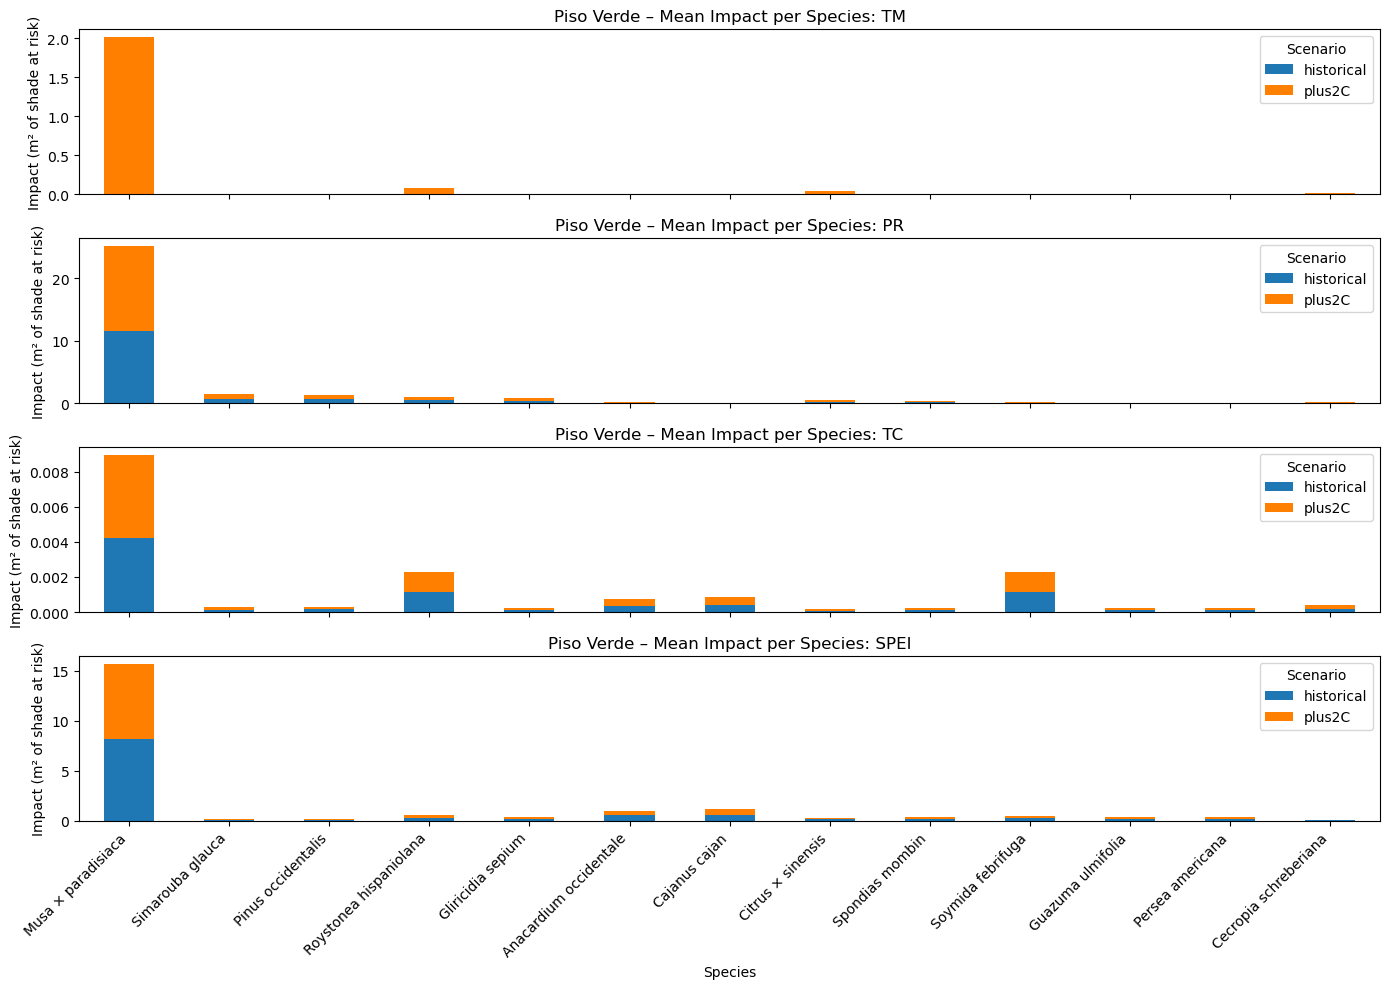

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define scenarios and hazards
scenarios = ["historical", "plus2C"]
hazards = ["TM", "PR", "TC", "SPEI"]
plot_labels = {0: "Aguacate", 1: "Piso Verde"}

# Consistent colour mapping
scenario_color_map = {
    "historical": "#1f78b4",  # blue
    "plus2C": "#ff7f00"       # orange
}

for plot_idx, plot_name in plot_labels.items():
    # Filter species for this plot (1st and 2nd tree layer)
    species_names = agroforest_df[
        (agroforest_df["plot_index"] == plot_idx) &
        (agroforest_df["type"].isin(["1st tree", "2nd tree"]))
    ]["species"].values

    results = []

    for scenario in scenarios:
        for hazard in hazards:
            try:
                imp_mat = impact_results[plot_idx][scenario][hazard].imp_mat  # (time, species)
                mean_impact = imp_mat.mean(axis=0)

                df = pd.DataFrame({
                    "species": species_names,
                    "mean_impact": np.array(mean_impact).flatten(),
                    "hazard": hazard,
                    "scenario": scenario
                })
                results.append(df)
            except KeyError:
                print(f"⚠️ Missing data for Plot {plot_idx} | {scenario} - {hazard}")

    if not results:
        continue

    # Combine into one DataFrame
    impact_df = pd.concat(results, ignore_index=True)

    # Get consistent species order based on total impact under plus2C (all hazards)
    impact_total = (
        impact_df[impact_df["scenario"] == "plus2C"]
        .groupby("species")["mean_impact"]
        .sum()
        .sort_values(ascending=False)
    )
    species_order = impact_total.index

    # Plotting
    n_hazards = len(hazards)
    fig, axs = plt.subplots(n_hazards, 1, figsize=(14, 2.5 * n_hazards), sharex=True)

    for i, hazard in enumerate(hazards):
        df_plot = impact_df[impact_df["hazard"] == hazard]

        # Aggregate to avoid duplicate index errors
        df_pivot = (
            df_plot.groupby(["species", "scenario"])["mean_impact"]
            .mean()
            .unstack(fill_value=0)
        )

        # Reorder species and ensure consistent scenario columns
        df_pivot = df_pivot.loc[df_pivot.index.intersection(species_order)]
        df_pivot = df_pivot.loc[species_order]
        df_pivot = df_pivot.reindex(columns=["historical", "plus2C"], fill_value=0)

        if df_pivot.empty:
            continue

        df_pivot.plot(
            kind="bar", stacked=True, ax=axs[i],
            color=[scenario_color_map[sc] for sc in df_pivot.columns]
        )
        axs[i].set_title(f"{plot_name} – Mean Impact per Species: {hazard}")
        axs[i].set_ylabel("Impact (m² of shade at risk)")
        axs[i].legend(title="Scenario")

    axs[-1].set_xlabel("Species")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


In [44]:
impact_results[0]['plus2C']['TM'].tot_value

2025-06-19 12:29:27,770 - climada.engine.impact - WARNING - The Impact.tot_value attribute is deprecated.Use Exposures.affected_total_value to calculate the affected total exposure value based on a specific hazard intensity threshold


948.5167806634097